In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # cool seaborn style plots

Path for the saved results:

In [24]:
path = './results/'

Load saved results:

In [25]:
results = np.load(path + 'TD3_Pendulum-v0_0.npy')

Evaluations are done every 5000 timesteps:

In [26]:
t = [5000*i for i in range(len(results))]

Visualize the evaluation returns:

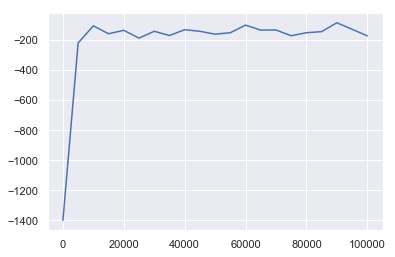

In [34]:
sns.lineplot(t, results);